# Import needed libraries

## Import libraries for manipulating the data and statistic

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.weightstats import  ttest_ind as t_test
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
import scipy.special as special
import emoji
from math import pi
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from scipy.stats import friedmanchisquare, rankdata, norm
from scipy.special import gammaln
from math import sqrt

## Import libraries for static ploting

In [21]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
# some nice colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

# Statring the test and visulize the data

## Load the data

In [22]:
datafile = "./results/result_naomy.xlsx"
df_accuracy = pd.read_excel(datafile, sheetname='accuracy')
df_f1_score = pd.read_excel(datafile, sheetname='f1score')
df_precision = pd.read_excel(datafile, sheetname='precision')
df_recall    = pd.read_excel(datafile, sheetname='recall')

# 1. Accuracy

In [23]:
df1 = df_accuracy.copy()

## Using Nonparametric tests

I am not sure the data comes from Guassian distribution  and less than 30 sample 

### alternative to paired t-test when data has an ordinary scale or when not
### normally distributed

## Start comparining all pruning algorithms

### Compute friedman test test by ranks between pruning methods

In [24]:
df1

,Methods,Knn,LSVM,SVM,DT_gini,DT_entorpy,Bagging Knn,Bagging DT,Random Forest,Ada Boost,...,Xgboost,NN,UCB1,E Greedy,Decay E Gr.,Softmax,Decay SM,Tomp. Sampling,Hedge,EXP3
0,SPAM,0.908795,0.920738,0.944625,0.893594,0.910966,0.932682,0.915309,0.890337,0.745928,...,0.844734,0.944625,0.947883,0.944625,0.944625,0.944625,0.944625,0.944625,0.943540,0.941368
1,ABALONE,0.540670,0.538278,0.578947,0.476077,0.468900,0.557416,0.545455,0.510766,0.540670,...,0.569378,0.580144,0.572967,0.572967,0.572967,0.572967,0.572967,0.572967,0.572967,0.572967
2,ADULT,0.816786,0.798362,0.833675,0.788127,0.796827,0.821648,0.812180,0.828813,0.817298,...,0.836745,0.835466,0.832395,0.821648,0.839048,0.828301,0.834186,0.832395,0.834442,0.831116
3,CANCER,0.929825,0.947368,0.973684,0.947368,0.929825,0.964912,0.956140,0.964912,0.938596,...,0.947368,0.964912,0.964912,0.964912,0.956140,0.964912,0.964912,0.964912,0.964912,0.973684
4,CAR,0.953757,0.846821,0.950867,0.930636,0.950867,0.786127,0.789017,0.898844,0.887283,...,0.927746,0.953757,0.936416,0.924855,0.919075,0.875723,0.800578,0.936416,0.864162,0.864162
5,GLASS,0.627907,0.558140,0.581395,0.465116,0.511628,0.627907,0.581395,0.511628,0.558140,...,0.534884,0.604651,0.651163,0.581395,0.604651,0.604651,0.581395,0.651163,0.604651,0.534884
6,HEART,0.541667,0.508333,0.750000,0.725000,0.766667,0.575000,0.733333,0.775000,0.483333,...,0.725000,0.608333,0.641667,0.625000,0.575000,0.583333,0.575000,0.575000,0.566667,0.566667
7,IRIS,1.000000,0.933333,1.000000,1.000000,0.900000,0.966667,0.866667,1.000000,0.933333,...,0.933333,0.966667,1.000000,0.933333,0.900000,0.900000,0.666667,0.666667,0.666667,0.633333
8,PIMA,0.688312,0.629870,0.720779,0.642857,0.688312,0.642857,0.649351,0.707792,0.668831,...,0.668831,0.688312,0.701299,0.688312,0.701299,0.707792,0.707792,0.701299,0.694805,0.688312
9,POKER,0.470109,0.274457,0.453804,0.619565,0.614130,0.445652,0.448370,0.673913,0.288043,...,0.336957,0.342391,0.361413,0.307065,0.339674,0.320652,0.301630,0.339674,0.345109,0.323370


In [25]:
data =  np.stack((df1['Knn'], df1['LSVM'], df1['SVM'], df1['DT_gini'], df1['DT_entorpy'], 
               df1['Bagging Knn'],df1['Bagging DT'], df1['Random Forest'], 
               df1['Ada Boost'], df1['NB'], df1['LDA'], df1['QDA'],
               df1['Log. Reg.'], df1['GP Class.'], df1['LightGBM'], df1['Xgboost'],
               df1['NN'], df1['UCB1'],df1['E Greedy'], df1['Decay E Gr.'],
               df1['Softmax'], df1['Decay SM'], df1['Tomp. Sampling'],
               df1['Hedge'], df1['EXP3']))

In [26]:
print(friedmanchisquare(df1['Knn'], df1['LSVM'], df1['SVM'], df1['DT_gini'], df1['DT_entorpy'], 
               df1['Bagging Knn'],df1['Bagging DT'], df1['Random Forest'], 
               df1['Ada Boost'], df1['NB'], df1['LDA'], df1['QDA'],
               df1['Log. Reg.'], df1['GP Class.'], df1['LightGBM'], df1['Xgboost'],
               df1['NN'], df1['UCB1'],df1['E Greedy'], df1['Decay E Gr.'],
               df1['Softmax'], df1['Decay SM'], df1['Tomp. Sampling'],
               df1['Hedge'], df1['EXP3']))

FriedmanchisquareResult(statistic=121.87407351950296, pvalue=4.4931769454017029e-15)


In [27]:
exec(open("nemopy.py").read())
nemenyi = NemenyiTestPostHoc(data)
meanRanks, pValues = nemenyi.do()

In [28]:
lst = list(df1.columns.values)
lst.remove('Methods')

In [29]:
len(lst)

25

In [30]:
df1.iloc[1].size

26

In [31]:
q = 3.10# pvalue = 0.05 and number of datasets 3.426041249
#q = 3.029694463 # pvalue = 0.1
N = (df1['NN'].size)
k = (df1.iloc[1].size)-1

In [32]:
CD = q * sqrt(k*(k+1)/(6.0*N))

In [33]:
CD

8.066455747931263

In [34]:
lst

['Knn',
 'LSVM',
 'SVM',
 'DT_gini',
 'DT_entorpy',
 'Bagging Knn',
 'Bagging DT',
 'Random Forest',
 'Ada Boost',
 'NB',
 'LDA',
 'QDA',
 'Log. Reg.',
 'GP Class.',
 'LightGBM',
 'Xgboost',
 'NN',
 'UCB1',
 'E Greedy',
 'Decay E Gr.',
 'Softmax',
 'Decay SM',
 'Tomp. Sampling',
 'Hedge',
 'EXP3']

In [35]:
new_model_pairs = []
for m1,m2 in zip(meanRanks,lst): 
    print('\n',m2, m1, )


 Knn 14.15625

 LSVM 7.59375

 SVM 20.21875

 DT_gini 9.875

 DT_entorpy 11.15625

 Bagging Knn 13.1875

 Bagging DT 10.40625

 Random Forest 14.5

 Ada Boost 6.90625

 NB 4.1875

 LDA 8.3125

 QDA 8.84375

 Log. Reg. 8.78125

 GP Class. 16.90625

 LightGBM 14.09375

 Xgboost 13.8125

 NN 18.53125

 UCB1 19.0625

 E Greedy 15.625

 Decay E Gr. 15.71875

 Softmax 15.15625

 Decay SM 14.96875

 Tomp. Sampling 16.3125

 Hedge 14.40625

 EXP3 12.28125


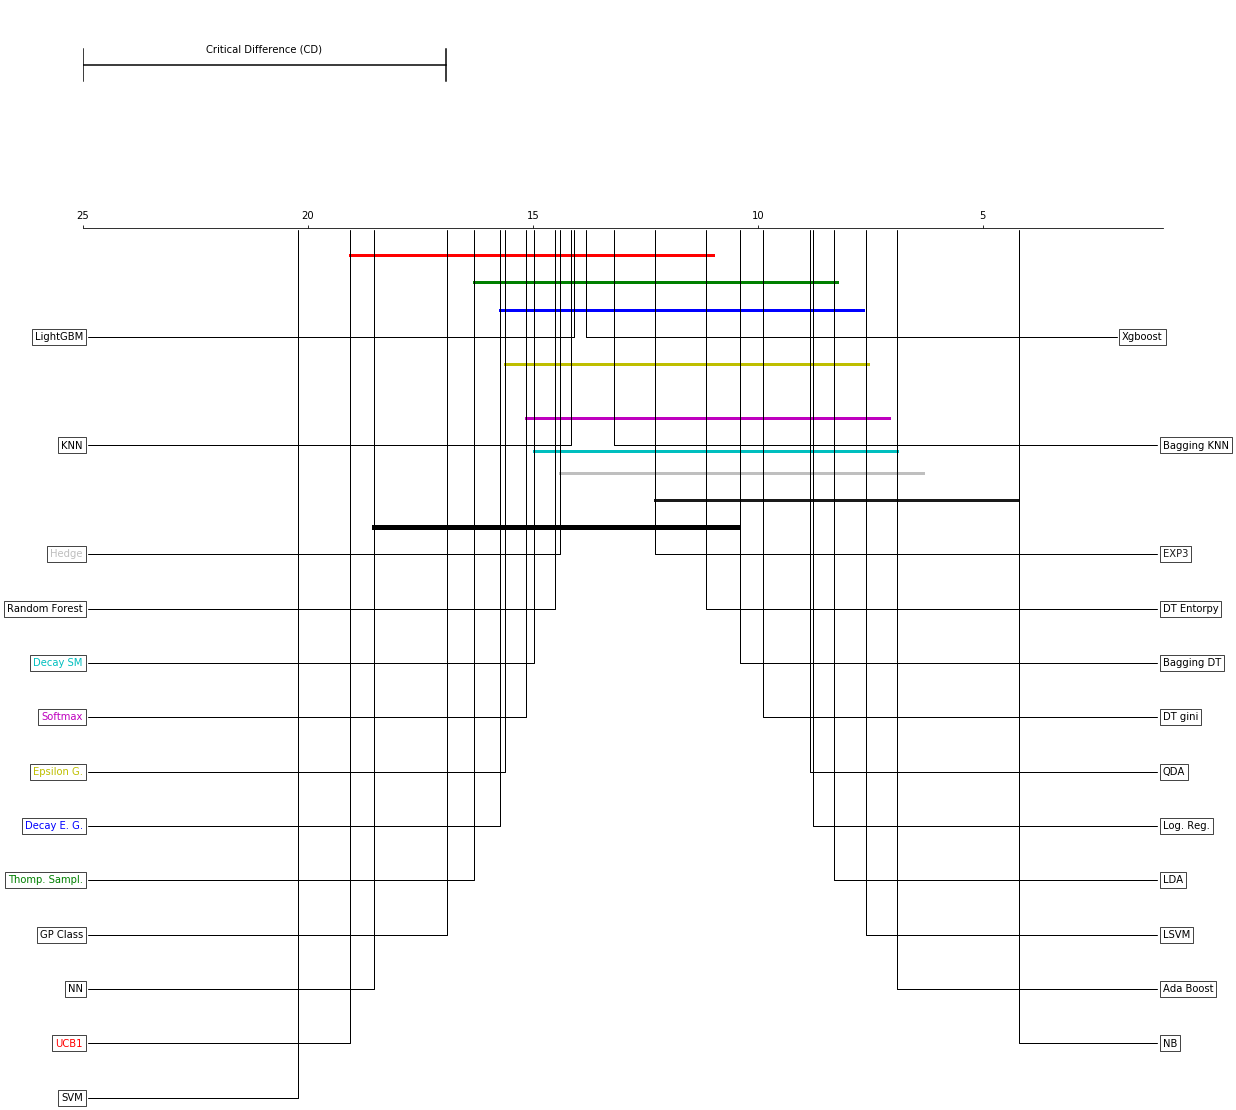

In [36]:
# input data
cd = CD
limits=(25,1)
fig, ax = plt.subplots(figsize=(25,10))
plt.subplots_adjust(left=0.2, right=0.8)

# set up plot
ax.set_xlim(limits)
ax.set_ylim(0,1)
ax.spines['top'].set_position(('axes', 0.6))
#ax.xaxis.tick_top()
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_visible(False)
for pos in ["bottom", "left", "right"]:
    ax.spines[pos].set_visible(False)

# CD bar
ax.plot([limits[0],limits[0]-cd], [.9,.9], color="k")
ax.plot([limits[0],limits[0]], [.9-0.03,.9+0.03], color="k")
ax.plot([limits[0]-cd,limits[0]-cd], [.9-0.03,.9+0.03], color="k") 
ax.text(limits[0]-cd/2., 0.92, "Critical Difference (CD)", ha="center", va="bottom") 

# annotations
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90")
kw = dict(xycoords='data',textcoords="axes fraction",
          arrowprops=arrowprops, bbox=bbox_props, va="center")

ax.annotate("SVM", xy=(meanRanks[2], 0.6), xytext=(0,-1.0),ha="right",  **kw, color="k")
ax.annotate("UCB1", xy=(meanRanks[17], 0.6), xytext=(0,-0.9),ha="right",  **kw, color="r")
ax.annotate("NN", xy=(meanRanks[16], 0.6), xytext=(0,-0.8),ha="right",  **kw, color="0")
ax.annotate("GP Class", xy=(meanRanks[13], 0.6), xytext=(0,-0.7),ha="right",  **kw, color="k")
ax.annotate("Thomp. Sampl.", xy=(meanRanks[22], 0.6), xytext=(0,-0.6),ha="right",  **kw, color="g")
ax.annotate("Decay E. G.", xy=(meanRanks[19], 0.6), xytext=(0,-0.5),ha="right",  **kw, color="b")
ax.annotate("Epsilon G.", xy=(meanRanks[18], 0.6), xytext=(0,-0.4),ha="right",  **kw, color="y")
ax.annotate("Softmax", xy=(meanRanks[20], 0.6), xytext=(0,-0.3),ha="right",  **kw, color="m")
ax.annotate("Decay SM", xy=(meanRanks[21], 0.6), xytext=(0,-0.2),ha="right",  **kw, color="c")
ax.annotate("Random Forest", xy=(meanRanks[7], 0.6), xytext=(0,-0.1),ha="right",  **kw, color="k")
ax.annotate("Hedge", xy=(meanRanks[23], 0.6), xytext=(0,0),ha="right",  **kw, color="0.75")
ax.annotate("KNN", xy=(meanRanks[0], 0.6), xytext=(0,0.2),ha="right",  **kw, color="k")
ax.annotate("LightGBM", xy=(meanRanks[14], 0.6), xytext=(0,0.4),ha="right",  **kw, color="k")

ax.annotate("NB", xy=(meanRanks[9], 0.6), xytext=(1,-0.9),ha="left",  **kw, color="k")
ax.annotate("Ada Boost", xy=(meanRanks[8], 0.6), xytext=(1,-0.8),ha="left",  **kw, color="k")
ax.annotate("LSVM", xy=(meanRanks[1], 0.6), xytext=(1,-0.7),ha="left",  **kw, color="k")
ax.annotate("LDA", xy=(meanRanks[10], 0.6), xytext=(1,-0.6),ha="left",  **kw, color="k")
ax.annotate("Log. Reg.", xy=(meanRanks[12], 0.6), xytext=(1,-0.5),ha="left",  **kw, color="k")
ax.annotate("QDA", xy=(meanRanks[11], 0.6), xytext=(1,-0.4),ha="left",  **kw, color="k")
ax.annotate("DT gini", xy=(meanRanks[3], 0.6), xytext=(1,-0.3),ha="left",  **kw, color="k")
ax.annotate("Bagging DT", xy=(meanRanks[6], 0.6), xytext=(1,-0.2),ha="left",  **kw, color="k")
ax.annotate("DT Entorpy", xy=(meanRanks[4], 0.6), xytext=(1,-0.1),ha="left",  **kw, color="k")
ax.annotate("EXP3", xy=(meanRanks[24], 0.6), xytext=(1,0),ha="left",  **kw, color="0.10")
ax.annotate("Bagging KNN", xy=(meanRanks[5], 0.6), xytext=(1,0.2),ha="left",  **kw, color="k")
ax.annotate("Xgboost", xy=(meanRanks[15], 0.6), xytext=(1,0.4),ha="right",  **kw, color="k")

#bars
ax.plot([meanRanks[17],meanRanks[17]-CD],[0.55,0.55], color="r", lw=3)
ax.plot([meanRanks[22],meanRanks[22]-CD],[0.50,0.50], color="g", lw=3)
ax.plot([meanRanks[19],meanRanks[19]-CD],[0.45,0.45], color="b", lw=3)
ax.plot([meanRanks[18],meanRanks[18]-CD],[0.35,0.35], color="y", lw=3)
ax.plot([meanRanks[20],meanRanks[20]-CD],[0.25,0.25], color="m", lw=3)
ax.plot([meanRanks[21],meanRanks[21]-CD],[0.19,0.19], color="c", lw=3)
ax.plot([meanRanks[23],meanRanks[23]-CD],[0.15,0.15], color="0.75", lw=3)
ax.plot([meanRanks[24],meanRanks[24]-CD],[0.10,0.10], color="0.10", lw=3)
ax.plot([meanRanks[16],meanRanks[16]-CD],[0.05,0.05], color="0", lw=5)




plt.show()

# 2. f1score

In [37]:
df1 = df_f1_score.copy()

In [38]:
data =  np.stack((df1['Knn'], df1['LSVM'], df1['SVM'], df1['DT_gini'], df1['DT_entorpy'], 
               df1['Bagging Knn'],df1['Bagging DT'], df1['Random Forest'], 
               df1['Ada Boost'], df1['NB'], df1['LDA'], df1['QDA'],
               df1['Log. Reg.'], df1['GP Class.'], df1['LightGBM'], df1['Xgboost'],
               df1['NN'], df1['UCB1'],df1['E Greedy'], df1['Decay E Gr.'],
               df1['Softmax'], df1['Decay SM'], df1['Tomp. Sampling'],
               df1['Hedge'], df1['EXP3']))

In [39]:
print(friedmanchisquare(df1['Knn'], df1['LSVM'], df1['SVM'], df1['DT_gini'], df1['DT_entorpy'], 
               df1['Bagging Knn'],df1['Bagging DT'], df1['Random Forest'], 
               df1['Ada Boost'], df1['NB'], df1['LDA'], df1['QDA'],
               df1['Log. Reg.'], df1['GP Class.'], df1['LightGBM'], df1['Xgboost'],
               df1['NN'], df1['UCB1'],df1['E Greedy'], df1['Decay E Gr.'],
               df1['Softmax'], df1['Decay SM'], df1['Tomp. Sampling'],
               df1['Hedge'], df1['EXP3']))

FriedmanchisquareResult(statistic=82.925271302499354, pvalue=2.0665400210355926e-08)


In [40]:
exec(open("nemopy.py").read())
nemenyi = NemenyiTestPostHoc(data)
meanRanks, pValues = nemenyi.do()

In [41]:
new_model_pairs = []
for m1,m2 in zip(meanRanks,lst): 
    print('\n',m2, m1, )


 Knn 14.4375

 LSVM 7.4375

 SVM 18.84375

 DT_gini 13.65625

 DT_entorpy 13.5625

 Bagging Knn 11.5

 Bagging DT 9.71875

 Random Forest 14.03125

 Ada Boost 8.03125

 NB 7.59375

 LDA 8.65625

 QDA 12.25

 Log. Reg. 7.96875

 GP Class. 17.34375

 LightGBM 12.25

 Xgboost 12.46875

 NN 17.84375

 UCB1 18.625

 E Greedy 15.0625

 Decay E Gr. 14.53125

 Softmax 13.96875

 Decay SM 13.3125

 Tomp. Sampling 16.03125

 Hedge 13.53125

 EXP3 12.34375


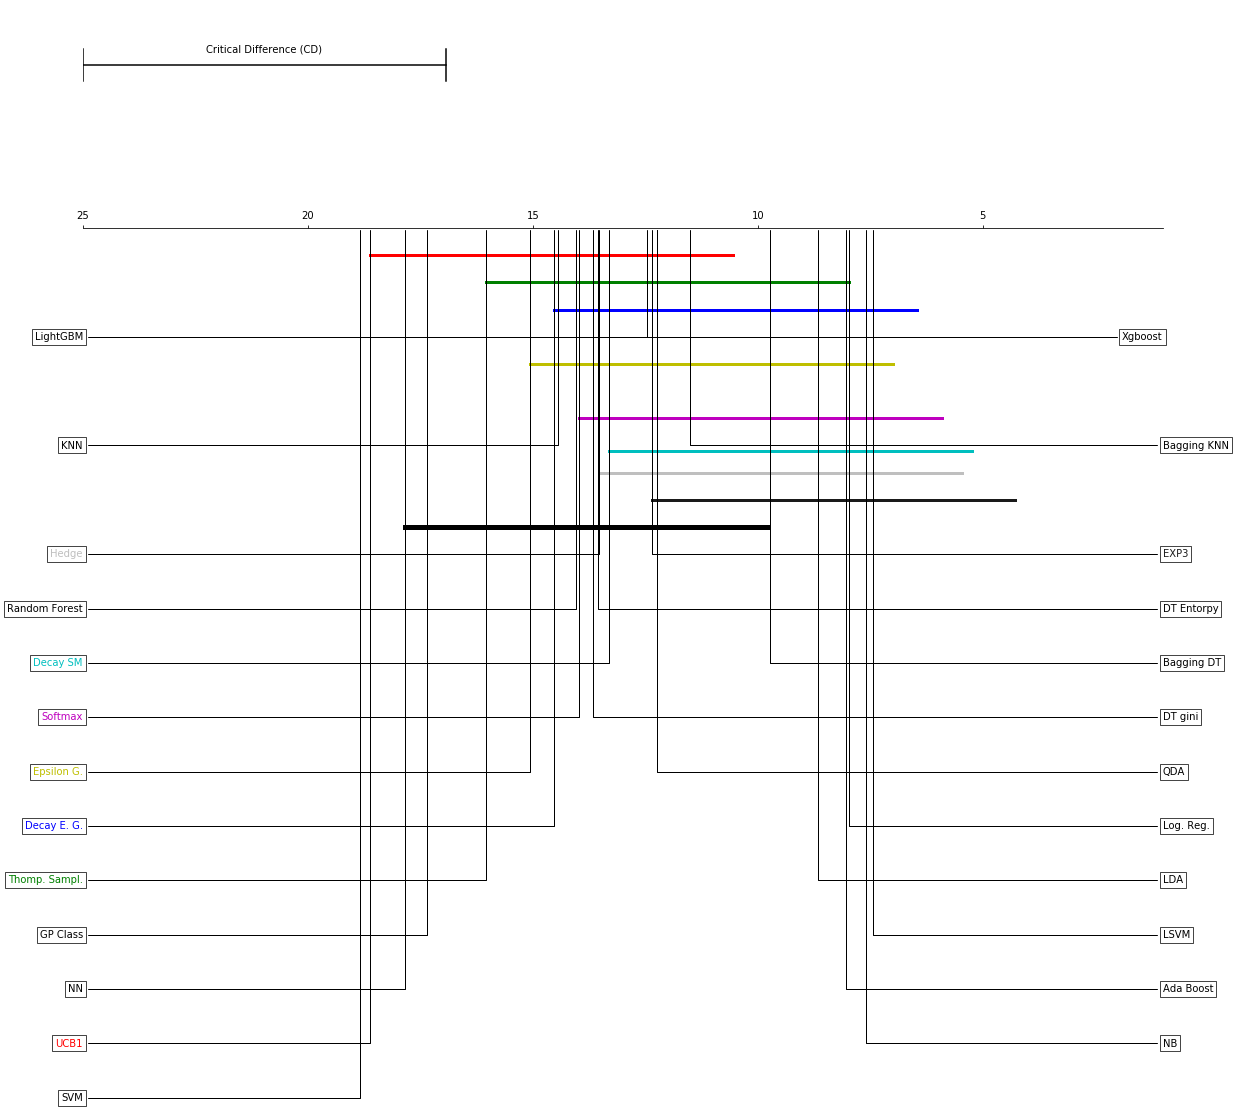

In [42]:
# input data
cd = CD
limits=(25,1)
fig, ax = plt.subplots(figsize=(25,10))
plt.subplots_adjust(left=0.2, right=0.8)

# set up plot
ax.set_xlim(limits)
ax.set_ylim(0,1)
ax.spines['top'].set_position(('axes', 0.6))
#ax.xaxis.tick_top()
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_visible(False)
for pos in ["bottom", "left", "right"]:
    ax.spines[pos].set_visible(False)

# CD bar
ax.plot([limits[0],limits[0]-cd], [.9,.9], color="k")
ax.plot([limits[0],limits[0]], [.9-0.03,.9+0.03], color="k")
ax.plot([limits[0]-cd,limits[0]-cd], [.9-0.03,.9+0.03], color="k") 
ax.text(limits[0]-cd/2., 0.92, "Critical Difference (CD)", ha="center", va="bottom") 

# annotations
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90")
kw = dict(xycoords='data',textcoords="axes fraction",
          arrowprops=arrowprops, bbox=bbox_props, va="center")

ax.annotate("SVM", xy=(meanRanks[2], 0.6), xytext=(0,-1.0),ha="right",  **kw, color="k")
ax.annotate("UCB1", xy=(meanRanks[17], 0.6), xytext=(0,-0.9),ha="right",  **kw, color="r")
ax.annotate("NN", xy=(meanRanks[16], 0.6), xytext=(0,-0.8),ha="right",  **kw, color="0")
ax.annotate("GP Class", xy=(meanRanks[13], 0.6), xytext=(0,-0.7),ha="right",  **kw, color="k")
ax.annotate("Thomp. Sampl.", xy=(meanRanks[22], 0.6), xytext=(0,-0.6),ha="right",  **kw, color="g")
ax.annotate("Decay E. G.", xy=(meanRanks[19], 0.6), xytext=(0,-0.5),ha="right",  **kw, color="b")
ax.annotate("Epsilon G.", xy=(meanRanks[18], 0.6), xytext=(0,-0.4),ha="right",  **kw, color="y")
ax.annotate("Softmax", xy=(meanRanks[20], 0.6), xytext=(0,-0.3),ha="right",  **kw, color="m")
ax.annotate("Decay SM", xy=(meanRanks[21], 0.6), xytext=(0,-0.2),ha="right",  **kw, color="c")
ax.annotate("Random Forest", xy=(meanRanks[7], 0.6), xytext=(0,-0.1),ha="right",  **kw, color="k")
ax.annotate("Hedge", xy=(meanRanks[23], 0.6), xytext=(0,0),ha="right",  **kw, color="0.75")
ax.annotate("KNN", xy=(meanRanks[0], 0.6), xytext=(0,0.2),ha="right",  **kw, color="k")
ax.annotate("LightGBM", xy=(meanRanks[14], 0.6), xytext=(0,0.4),ha="right",  **kw, color="k")

ax.annotate("NB", xy=(meanRanks[9], 0.6), xytext=(1,-0.9),ha="left",  **kw, color="k")
ax.annotate("Ada Boost", xy=(meanRanks[8], 0.6), xytext=(1,-0.8),ha="left",  **kw, color="k")
ax.annotate("LSVM", xy=(meanRanks[1], 0.6), xytext=(1,-0.7),ha="left",  **kw, color="k")
ax.annotate("LDA", xy=(meanRanks[10], 0.6), xytext=(1,-0.6),ha="left",  **kw, color="k")
ax.annotate("Log. Reg.", xy=(meanRanks[12], 0.6), xytext=(1,-0.5),ha="left",  **kw, color="k")
ax.annotate("QDA", xy=(meanRanks[11], 0.6), xytext=(1,-0.4),ha="left",  **kw, color="k")
ax.annotate("DT gini", xy=(meanRanks[3], 0.6), xytext=(1,-0.3),ha="left",  **kw, color="k")
ax.annotate("Bagging DT", xy=(meanRanks[6], 0.6), xytext=(1,-0.2),ha="left",  **kw, color="k")
ax.annotate("DT Entorpy", xy=(meanRanks[4], 0.6), xytext=(1,-0.1),ha="left",  **kw, color="k")
ax.annotate("EXP3", xy=(meanRanks[24], 0.6), xytext=(1,0),ha="left",  **kw, color="0.10")
ax.annotate("Bagging KNN", xy=(meanRanks[5], 0.6), xytext=(1,0.2),ha="left",  **kw, color="k")
ax.annotate("Xgboost", xy=(meanRanks[15], 0.6), xytext=(1,0.4),ha="right",  **kw, color="k")

#bars
ax.plot([meanRanks[17],meanRanks[17]-CD],[0.55,0.55], color="r", lw=3)
ax.plot([meanRanks[22],meanRanks[22]-CD],[0.50,0.50], color="g", lw=3)
ax.plot([meanRanks[19],meanRanks[19]-CD],[0.45,0.45], color="b", lw=3)
ax.plot([meanRanks[18],meanRanks[18]-CD],[0.35,0.35], color="y", lw=3)
ax.plot([meanRanks[20],meanRanks[20]-CD],[0.25,0.25], color="m", lw=3)
ax.plot([meanRanks[21],meanRanks[21]-CD],[0.19,0.19], color="c", lw=3)
ax.plot([meanRanks[23],meanRanks[23]-CD],[0.15,0.15], color="0.75", lw=3)
ax.plot([meanRanks[24],meanRanks[24]-CD],[0.10,0.10], color="0.10", lw=3)
ax.plot([meanRanks[16],meanRanks[16]-CD],[0.05,0.05], color="0", lw=5)




plt.show()

# 3. Precison

In [43]:
df1 = df_precision.copy()

In [44]:
data =  np.stack((df1['Knn'], df1['LSVM'], df1['SVM'], df1['DT_gini'], df1['DT_entorpy'], 
               df1['Bagging Knn'],df1['Bagging DT'], df1['Random Forest'], 
               df1['Ada Boost'], df1['NB'], df1['LDA'], df1['QDA'],
               df1['Log. Reg.'], df1['GP Class.'], df1['LightGBM'], df1['Xgboost'],
               df1['NN'], df1['UCB1'],df1['E Greedy'], df1['Decay E Gr.'],
               df1['Softmax'], df1['Decay SM'], df1['Tomp. Sampling'],
               df1['Hedge'], df1['EXP3']))

In [45]:
print(friedmanchisquare(df1['Knn'], df1['LSVM'], df1['SVM'], df1['DT_gini'], df1['DT_entorpy'], 
               df1['Bagging Knn'],df1['Bagging DT'], df1['Random Forest'], 
               df1['Ada Boost'], df1['NB'], df1['LDA'], df1['QDA'],
               df1['Log. Reg.'], df1['GP Class.'], df1['LightGBM'], df1['Xgboost'],
               df1['NN'], df1['UCB1'],df1['E Greedy'], df1['Decay E Gr.'],
               df1['Softmax'], df1['Decay SM'], df1['Tomp. Sampling'],
               df1['Hedge'], df1['EXP3']))

FriedmanchisquareResult(statistic=81.154498479491835, pvalue=3.9793195070035057e-08)


In [46]:
exec(open("nemopy.py").read())
nemenyi = NemenyiTestPostHoc(data)
meanRanks, pValues = nemenyi.do()

In [47]:
new_model_pairs = []
for m1,m2 in zip(meanRanks,lst): 
    print('\n',m2, m1, )


 Knn 13.125

 LSVM 8.59375

 SVM 20.15625

 DT_gini 10.78125

 DT_entorpy 10.90625

 Bagging Knn 13.0

 Bagging DT 11.90625

 Random Forest 16.59375

 Ada Boost 8.09375

 NB 5.40625

 LDA 9.8125

 QDA 9.28125

 Log. Reg. 10.875

 GP Class. 16.78125

 LightGBM 12.0625

 Xgboost 15.1875

 NN 15.59375

 UCB1 16.5

 E Greedy 14.1875

 Decay E Gr. 15.09375

 Softmax 14.625

 Decay SM 16.625

 Tomp. Sampling 13.78125

 Hedge 13.9375

 EXP3 12.09375


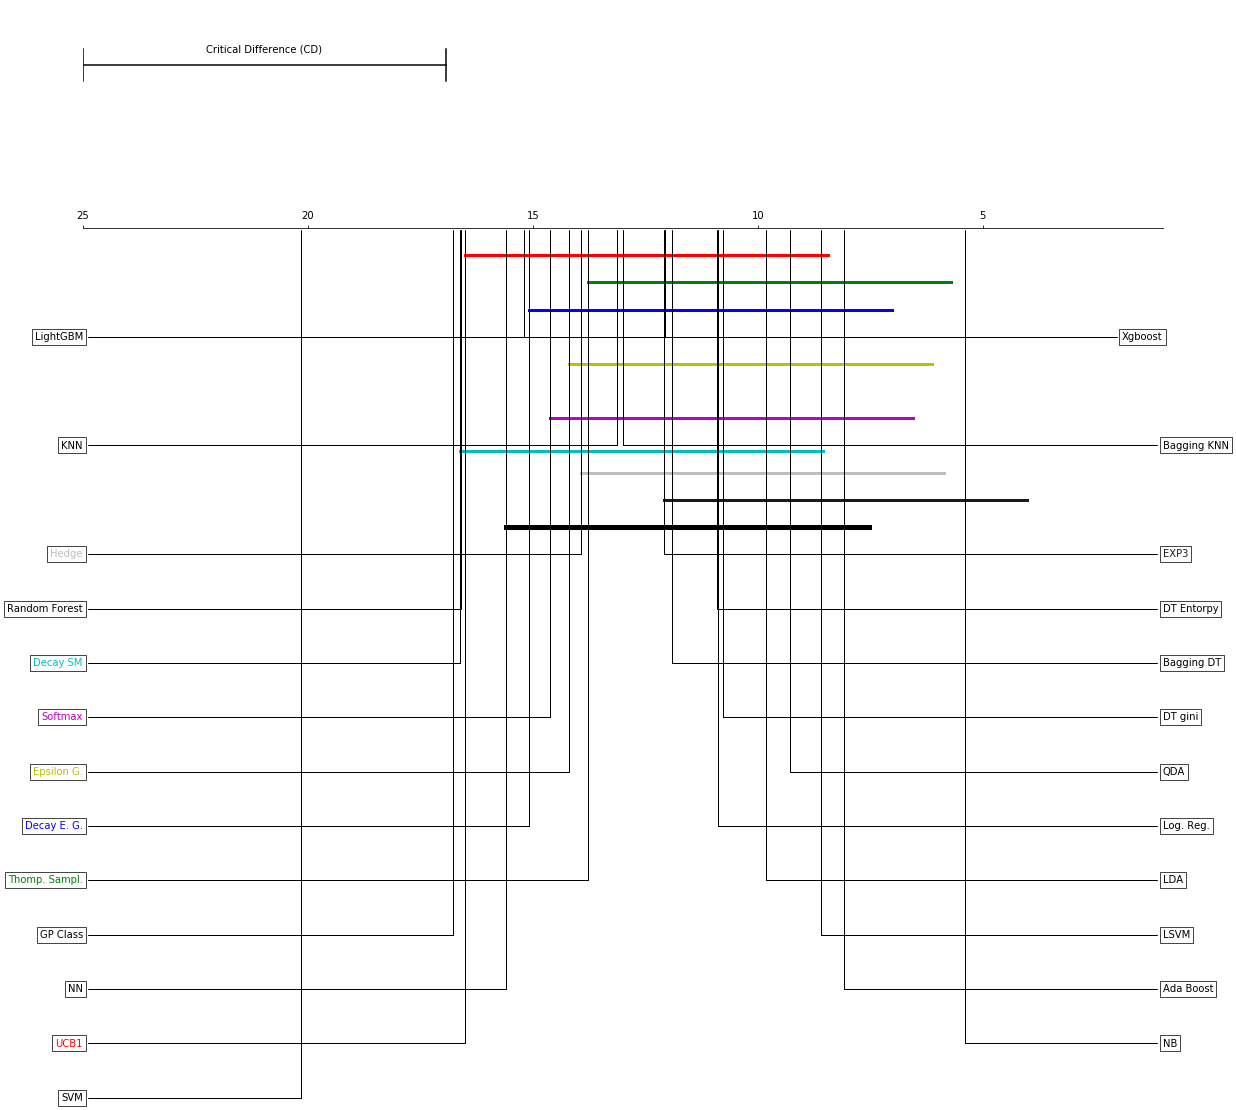

In [48]:
# input data
cd = CD
limits=(25,1)
fig, ax = plt.subplots(figsize=(25,10))
plt.subplots_adjust(left=0.2, right=0.8)

# set up plot
ax.set_xlim(limits)
ax.set_ylim(0,1)
ax.spines['top'].set_position(('axes', 0.6))
#ax.xaxis.tick_top()
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_visible(False)
for pos in ["bottom", "left", "right"]:
    ax.spines[pos].set_visible(False)

# CD bar
ax.plot([limits[0],limits[0]-cd], [.9,.9], color="k")
ax.plot([limits[0],limits[0]], [.9-0.03,.9+0.03], color="k")
ax.plot([limits[0]-cd,limits[0]-cd], [.9-0.03,.9+0.03], color="k") 
ax.text(limits[0]-cd/2., 0.92, "Critical Difference (CD)", ha="center", va="bottom") 

# annotations
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90")
kw = dict(xycoords='data',textcoords="axes fraction",
          arrowprops=arrowprops, bbox=bbox_props, va="center")

ax.annotate("SVM", xy=(meanRanks[2], 0.6), xytext=(0,-1.0),ha="right",  **kw, color="k")
ax.annotate("UCB1", xy=(meanRanks[17], 0.6), xytext=(0,-0.9),ha="right",  **kw, color="r")
ax.annotate("NN", xy=(meanRanks[16], 0.6), xytext=(0,-0.8),ha="right",  **kw, color="0")
ax.annotate("GP Class", xy=(meanRanks[13], 0.6), xytext=(0,-0.7),ha="right",  **kw, color="k")
ax.annotate("Thomp. Sampl.", xy=(meanRanks[22], 0.6), xytext=(0,-0.6),ha="right",  **kw, color="g")
ax.annotate("Decay E. G.", xy=(meanRanks[19], 0.6), xytext=(0,-0.5),ha="right",  **kw, color="b")
ax.annotate("Epsilon G.", xy=(meanRanks[18], 0.6), xytext=(0,-0.4),ha="right",  **kw, color="y")
ax.annotate("Softmax", xy=(meanRanks[20], 0.6), xytext=(0,-0.3),ha="right",  **kw, color="m")
ax.annotate("Decay SM", xy=(meanRanks[21], 0.6), xytext=(0,-0.2),ha="right",  **kw, color="c")
ax.annotate("Random Forest", xy=(meanRanks[7], 0.6), xytext=(0,-0.1),ha="right",  **kw, color="k")
ax.annotate("Hedge", xy=(meanRanks[23], 0.6), xytext=(0,0),ha="right",  **kw, color="0.75")
ax.annotate("KNN", xy=(meanRanks[0], 0.6), xytext=(0,0.2),ha="right",  **kw, color="k")
ax.annotate("LightGBM", xy=(meanRanks[14], 0.6), xytext=(0,0.4),ha="right",  **kw, color="k")

ax.annotate("NB", xy=(meanRanks[9], 0.6), xytext=(1,-0.9),ha="left",  **kw, color="k")
ax.annotate("Ada Boost", xy=(meanRanks[8], 0.6), xytext=(1,-0.8),ha="left",  **kw, color="k")
ax.annotate("LSVM", xy=(meanRanks[1], 0.6), xytext=(1,-0.7),ha="left",  **kw, color="k")
ax.annotate("LDA", xy=(meanRanks[10], 0.6), xytext=(1,-0.6),ha="left",  **kw, color="k")
ax.annotate("Log. Reg.", xy=(meanRanks[12], 0.6), xytext=(1,-0.5),ha="left",  **kw, color="k")
ax.annotate("QDA", xy=(meanRanks[11], 0.6), xytext=(1,-0.4),ha="left",  **kw, color="k")
ax.annotate("DT gini", xy=(meanRanks[3], 0.6), xytext=(1,-0.3),ha="left",  **kw, color="k")
ax.annotate("Bagging DT", xy=(meanRanks[6], 0.6), xytext=(1,-0.2),ha="left",  **kw, color="k")
ax.annotate("DT Entorpy", xy=(meanRanks[4], 0.6), xytext=(1,-0.1),ha="left",  **kw, color="k")
ax.annotate("EXP3", xy=(meanRanks[24], 0.6), xytext=(1,0),ha="left",  **kw, color="0.10")
ax.annotate("Bagging KNN", xy=(meanRanks[5], 0.6), xytext=(1,0.2),ha="left",  **kw, color="k")
ax.annotate("Xgboost", xy=(meanRanks[15], 0.6), xytext=(1,0.4),ha="right",  **kw, color="k")

#bars
ax.plot([meanRanks[17],meanRanks[17]-CD],[0.55,0.55], color="r", lw=3)
ax.plot([meanRanks[22],meanRanks[22]-CD],[0.50,0.50], color="g", lw=3)
ax.plot([meanRanks[19],meanRanks[19]-CD],[0.45,0.45], color="b", lw=3)
ax.plot([meanRanks[18],meanRanks[18]-CD],[0.35,0.35], color="y", lw=3)
ax.plot([meanRanks[20],meanRanks[20]-CD],[0.25,0.25], color="m", lw=3)
ax.plot([meanRanks[21],meanRanks[21]-CD],[0.19,0.19], color="c", lw=3)
ax.plot([meanRanks[23],meanRanks[23]-CD],[0.15,0.15], color="0.75", lw=3)
ax.plot([meanRanks[24],meanRanks[24]-CD],[0.10,0.10], color="0.10", lw=3)
ax.plot([meanRanks[16],meanRanks[16]-CD],[0.05,0.05], color="0", lw=5)




plt.show()

# 4. Recall

In [49]:
df1 = df_recall.copy()

In [50]:
data =  np.stack((df1['Knn'], df1['LSVM'], df1['SVM'], df1['DT_gini'], df1['DT_entorpy'], 
               df1['Bagging Knn'],df1['Bagging DT'], df1['Random Forest'], 
               df1['Ada Boost'], df1['NB'], df1['LDA'], df1['QDA'],
               df1['Log. Reg.'], df1['GP Class.'], df1['LightGBM'], df1['Xgboost'],
               df1['NN'], df1['UCB1'],df1['E Greedy'], df1['Decay E Gr.'],
               df1['Softmax'], df1['Decay SM'], df1['Tomp. Sampling'],
               df1['Hedge'], df1['EXP3']))

In [51]:
print(friedmanchisquare(df1['Knn'], df1['LSVM'], df1['SVM'], df1['DT_gini'], df1['DT_entorpy'], 
               df1['Bagging Knn'],df1['Bagging DT'], df1['Random Forest'], 
               df1['Ada Boost'], df1['NB'], df1['LDA'], df1['QDA'],
               df1['Log. Reg.'], df1['GP Class.'], df1['LightGBM'], df1['Xgboost'],
               df1['NN'], df1['UCB1'],df1['E Greedy'], df1['Decay E Gr.'],
               df1['Softmax'], df1['Decay SM'], df1['Tomp. Sampling'],
               df1['Hedge'], df1['EXP3']))

FriedmanchisquareResult(statistic=71.599949488571895, pvalue=1.2482424215975254e-06)


In [52]:
exec(open("nemopy.py").read())
nemenyi = NemenyiTestPostHoc(data)
meanRanks, pValues = nemenyi.do()

In [53]:
new_model_pairs = []
for m1,m2 in zip(meanRanks,lst): 
    print('\n',m2, m1, )


 Knn 14.3125

 LSVM 8.875

 SVM 18.65625

 DT_gini 16.0625

 DT_entorpy 14.46875

 Bagging Knn 11.03125

 Bagging DT 8.125

 Random Forest 12.75

 Ada Boost 10.40625

 NB 9.71875

 LDA 8.3125

 QDA 13.03125

 Log. Reg. 8.40625

 GP Class. 17.21875

 LightGBM 10.90625

 Xgboost 11.9375

 NN 17.21875

 UCB1 18.0625

 E Greedy 14.625

 Decay E Gr. 14.3125

 Softmax 13.71875

 Decay SM 12.71875

 Tomp. Sampling 15.53125

 Hedge 13.03125

 EXP3 11.5625


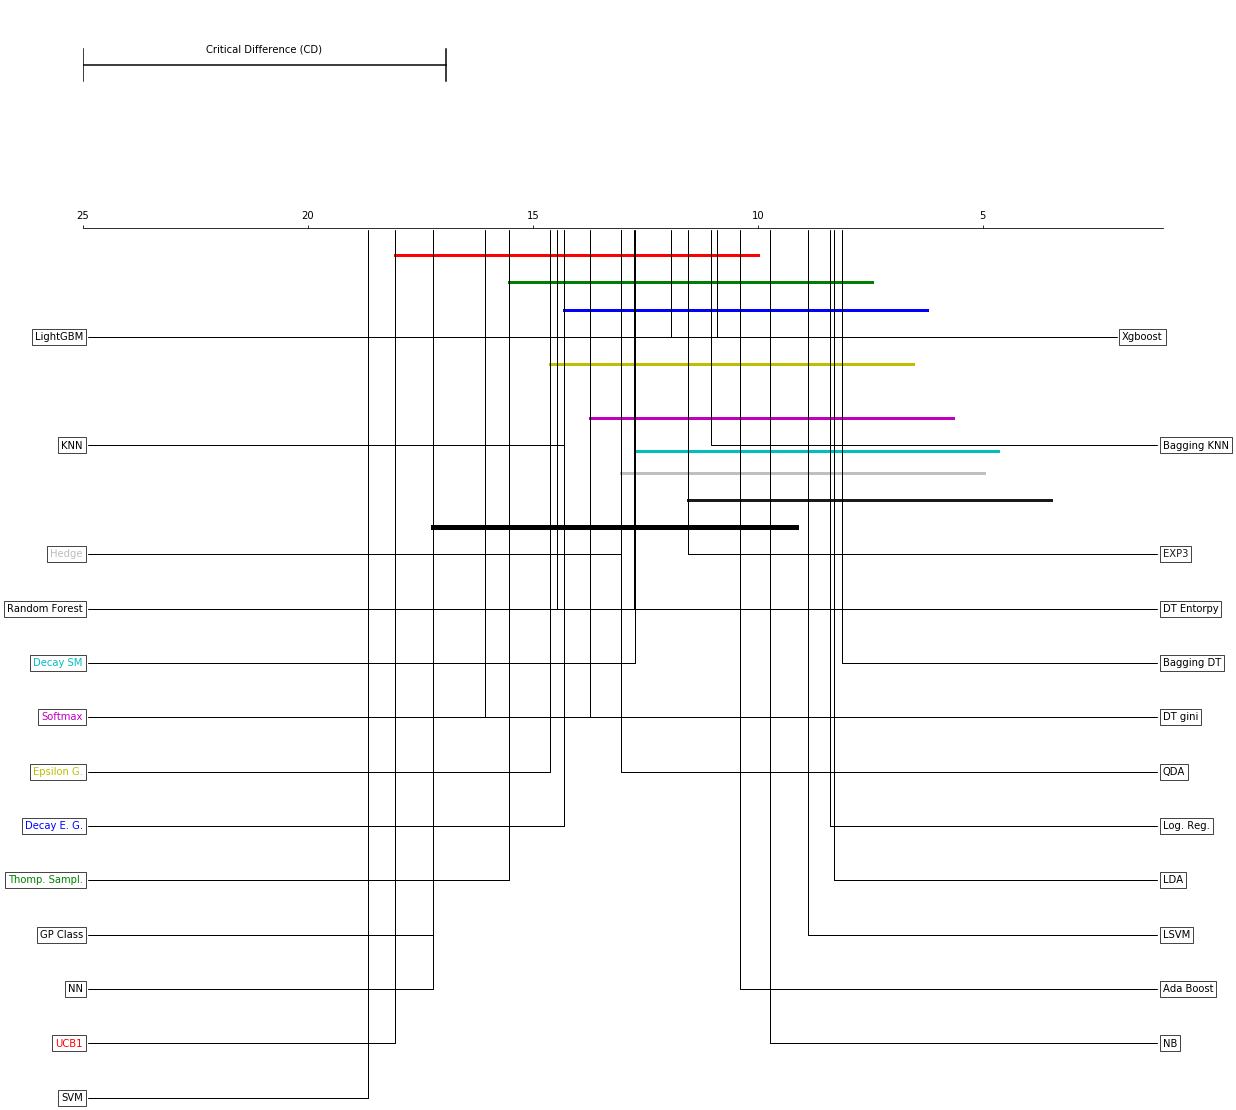

In [54]:
# input data
cd = CD
limits=(25,1)
fig, ax = plt.subplots(figsize=(25,10))
plt.subplots_adjust(left=0.2, right=0.8)

# set up plot
ax.set_xlim(limits)
ax.set_ylim(0,1)
ax.spines['top'].set_position(('axes', 0.6))
#ax.xaxis.tick_top()
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_visible(False)
for pos in ["bottom", "left", "right"]:
    ax.spines[pos].set_visible(False)

# CD bar
ax.plot([limits[0],limits[0]-cd], [.9,.9], color="k")
ax.plot([limits[0],limits[0]], [.9-0.03,.9+0.03], color="k")
ax.plot([limits[0]-cd,limits[0]-cd], [.9-0.03,.9+0.03], color="k") 
ax.text(limits[0]-cd/2., 0.92, "Critical Difference (CD)", ha="center", va="bottom") 

# annotations
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90")
kw = dict(xycoords='data',textcoords="axes fraction",
          arrowprops=arrowprops, bbox=bbox_props, va="center")

ax.annotate("SVM", xy=(meanRanks[2], 0.6), xytext=(0,-1.0),ha="right",  **kw, color="k")
ax.annotate("UCB1", xy=(meanRanks[17], 0.6), xytext=(0,-0.9),ha="right",  **kw, color="r")
ax.annotate("NN", xy=(meanRanks[16], 0.6), xytext=(0,-0.8),ha="right",  **kw, color="0")
ax.annotate("GP Class", xy=(meanRanks[13], 0.6), xytext=(0,-0.7),ha="right",  **kw, color="k")
ax.annotate("Thomp. Sampl.", xy=(meanRanks[22], 0.6), xytext=(0,-0.6),ha="right",  **kw, color="g")
ax.annotate("Decay E. G.", xy=(meanRanks[19], 0.6), xytext=(0,-0.5),ha="right",  **kw, color="b")
ax.annotate("Epsilon G.", xy=(meanRanks[18], 0.6), xytext=(0,-0.4),ha="right",  **kw, color="y")
ax.annotate("Softmax", xy=(meanRanks[20], 0.6), xytext=(0,-0.3),ha="right",  **kw, color="m")
ax.annotate("Decay SM", xy=(meanRanks[21], 0.6), xytext=(0,-0.2),ha="right",  **kw, color="c")
ax.annotate("Random Forest", xy=(meanRanks[7], 0.6), xytext=(0,-0.1),ha="right",  **kw, color="k")
ax.annotate("Hedge", xy=(meanRanks[23], 0.6), xytext=(0,0),ha="right",  **kw, color="0.75")
ax.annotate("KNN", xy=(meanRanks[0], 0.6), xytext=(0,0.2),ha="right",  **kw, color="k")
ax.annotate("LightGBM", xy=(meanRanks[14], 0.6), xytext=(0,0.4),ha="right",  **kw, color="k")

ax.annotate("NB", xy=(meanRanks[9], 0.6), xytext=(1,-0.9),ha="left",  **kw, color="k")
ax.annotate("Ada Boost", xy=(meanRanks[8], 0.6), xytext=(1,-0.8),ha="left",  **kw, color="k")
ax.annotate("LSVM", xy=(meanRanks[1], 0.6), xytext=(1,-0.7),ha="left",  **kw, color="k")
ax.annotate("LDA", xy=(meanRanks[10], 0.6), xytext=(1,-0.6),ha="left",  **kw, color="k")
ax.annotate("Log. Reg.", xy=(meanRanks[12], 0.6), xytext=(1,-0.5),ha="left",  **kw, color="k")
ax.annotate("QDA", xy=(meanRanks[11], 0.6), xytext=(1,-0.4),ha="left",  **kw, color="k")
ax.annotate("DT gini", xy=(meanRanks[3], 0.6), xytext=(1,-0.3),ha="left",  **kw, color="k")
ax.annotate("Bagging DT", xy=(meanRanks[6], 0.6), xytext=(1,-0.2),ha="left",  **kw, color="k")
ax.annotate("DT Entorpy", xy=(meanRanks[4], 0.6), xytext=(1,-0.1),ha="left",  **kw, color="k")
ax.annotate("EXP3", xy=(meanRanks[24], 0.6), xytext=(1,0),ha="left",  **kw, color="0.10")
ax.annotate("Bagging KNN", xy=(meanRanks[5], 0.6), xytext=(1,0.2),ha="left",  **kw, color="k")
ax.annotate("Xgboost", xy=(meanRanks[15], 0.6), xytext=(1,0.4),ha="right",  **kw, color="k")

#bars
ax.plot([meanRanks[17],meanRanks[17]-CD],[0.55,0.55], color="r", lw=3)
ax.plot([meanRanks[22],meanRanks[22]-CD],[0.50,0.50], color="g", lw=3)
ax.plot([meanRanks[19],meanRanks[19]-CD],[0.45,0.45], color="b", lw=3)
ax.plot([meanRanks[18],meanRanks[18]-CD],[0.35,0.35], color="y", lw=3)
ax.plot([meanRanks[20],meanRanks[20]-CD],[0.25,0.25], color="m", lw=3)
ax.plot([meanRanks[21],meanRanks[21]-CD],[0.19,0.19], color="c", lw=3)
ax.plot([meanRanks[23],meanRanks[23]-CD],[0.15,0.15], color="0.75", lw=3)
ax.plot([meanRanks[24],meanRanks[24]-CD],[0.10,0.10], color="0.10", lw=3)
ax.plot([meanRanks[16],meanRanks[16]-CD],[0.05,0.05], color="0", lw=5)




plt.show()